## Customer Feedback Analytics

<img src="Images/adam-jang-8pOTAtyd_Mc-unsplash.jpg" width = "1500"/>

#### Introduction

Analysing survey results can be challenging. It's common for customers to experience similar experiences leading to groups of individuals selecting the same survey responses. However, they won't all select the same as people are interested in different things. For example, some go to a restaurant for atmosphere whilst others go primarily for the food. Clustering can help us gain a general concensus of our customers.

Clustering is an unsupervised machine learning method. Unsupervised techniques don't require labelled data (it doesn't need us humans to teach the model directly). This notebook will focus on clustering customer survey responses from an airline. This analysis could be used on any surveys that use a numerical scale.

Please note that it's important for each response to be on the same scale. An airline has been collecting feedback from their customers through their app. It's important for the executive team at the airline to understand the reponses to provide improvements to the airline.


<img src="images/dashboard.PNG">

0 - Strongly Disagree <br>
1 - Disagree <br>
2 - Neutral <br>
3 - Agree <br>
4 - Strongly Agree 
<br>

<br>
<b> Objectives: </b>
- Our key objective is to create a PowerBI dashboard to help us analyse the different trends amoung our customers. Attached final version below:




This notebook focuses on:
- Identifying groups that exist (Automatically finding patterns in our data)
- Visualising our results to learn about our customers
- Assess potentional outliers and assess simpsons paradox
- Intergate cluster outputs into an interactive dashboard
<br>
<br>

<b> Methodology </b> <br>
1- Create the data ensuring clusters exist <br>
2- Add randomness and noise to the data to mimic real life scenarios<br>
3- Identify the trends you would like the algorithm to detect <br>
4- Apply two different clustering algorithms and determine their performance based on detecting the expecting clusters <br>
5- Visualise the results <br>
6- Export this information to PowerBI and ensure the analysis can be understood by a non technical team
<br>
<br>
<br>
<b> Contents </b> <br>
<a href="#map1">1. Import relevant packages </a> <br>
<a href="#map2">2. Creating the raw data (dataframe) </a>  <br>
<a href="#map3">3. Unsupervised Learning (KMeans) - Elbow Method to determine K </a> <br>
<a href="#map4">4. Unsupervised Learning (KMeans) - Predict Cluster </a> <br>
<a href="#map5">5. Visualise results </a><br>
<a href="#map6">6. Export to PowerBI and Visualise results </a> <br>
<a href="#map7">7. Discussion </a><br>
<a href="#map8">8. Conclusion </a>


#### <a name="map1">1. Import Relevant Packages </a>

These packages are used to help achieve many tasks such as data cleaning, plotting visuals and machine learning.

In [2]:
import pandas as pd                                              #Data Wrangling/Cleaning package for mixed data
import numpy as np                                               #Data wrangling & manipulation for purely numerical data
import matplotlib.pyplot as plt                                  #Plotting library

from sklearn.cluster import KMeans                               #Unsupervised Learning algorithm KMeans
from sklearn.datasets import make_blobs                          #Data Generator from Sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score                     #Package to help determine the optimal K Value (no. of clusters)

#### <a name="map2">2. Create Raw Data</a>
We will utilise the make blobs function from sklearn to artifically create clustered data. A good test to see if our algorithm detected the predefined number of clusters<br>



In [3]:
I, b = make_blobs(n_samples=37, #37 people responded to the survey
                  centers = 3,  #Three clusters
                  n_features=6, #Number of Survey Questions
                  center_box =(0, 4), 
                  cluster_std = 0.3,
                  random_state= 42) #Repeatability

Names1 = ["Sarah", "Mo", "David", "Neil", "Viraj", "Jaxson Spencer","Camryn Bond","Adonis Davies",
          "Salvatore Mann"," Marie Whitney","Damarion Rowe","Tatum Booker","Alyson Hull","Saige Wells",
          "Tyrell Lane","Jazlyn Everett","Nia Dawson","Evelyn Torres","Kate Rivera","Killian Douglas",
          "Isaias Bond","Lorena Nielsen","Reese Hunter","amari Walters","Korbin Mcconnell","Autumn Martin","Averie Raymond",
          "Hector Weaver","Zayden Moyer","Bridget Navarro","Dominique Fletcher","Jillian Woodard","Sofia Rivers",
          "Efrain Whitney","Gwendolyn Baxter","Ayana Greer","Jazlynn Richmond"] #List of random names

Let's take a look at what we have created

In [2]:
I,b

NameError: name 'I' is not defined

<b> Problems so far </b>

Numbers can only be 0,1,2,3,4 or 5.


Round the values - Survey responses are on a 5 points scale 
Some values are negative! -  Can't have negative numbers

In [5]:
I = I.round(0)


In [6]:
I = np.where(I==-0, 0, I)     #negative 0 case made positive           
I = np.where(I<0,0,I)         #values less than 0 made postive

In [7]:
I

array([[2., 4., 3., 3., 1., 1.],
       [3., 1., 1., 2., 1., 2.],
       [1., 3., 3., 2., 1., 0.],
       [1., 4., 3., 2., 0., 1.],
       [0., 3., 3., 3., 0., 4.],
       [1., 4., 3., 2., 1., 0.],
       [3., 1., 1., 0., 1., 2.],
       [3., 1., 1., 1., 1., 2.],
       [2., 4., 3., 3., 1., 1.],
       [3., 1., 1., 0., 1., 2.],
       [0., 4., 2., 3., 0., 4.],
       [1., 4., 3., 3., 0., 1.],
       [0., 4., 2., 3., 0., 4.],
       [1., 4., 3., 3., 1., 0.],
       [0., 3., 2., 2., 0., 4.],
       [3., 1., 1., 1., 2., 2.],
       [2., 4., 3., 2., 0., 1.],
       [0., 3., 2., 3., 0., 4.],
       [0., 3., 2., 3., 0., 4.],
       [1., 4., 3., 2., 0., 0.],
       [1., 4., 3., 2., 0., 0.],
       [1., 3., 3., 3., 1., 1.],
       [3., 1., 1., 1., 1., 2.],
       [0., 4., 2., 3., 0., 4.],
       [1., 4., 3., 2., 1., 1.],
       [3., 1., 1., 1., 1., 2.],
       [0., 3., 3., 3., 0., 4.],
       [4., 1., 1., 1., 1., 2.],
       [3., 1., 1., 2., 1., 2.],
       [4., 1., 1., 1., 1., 2.],
       [3.

#### Add Survey Questions as the column headers

We created seperate blobs to add some noise to the dataset making it more realistic

In [8]:
Set1 = pd.DataFrame({'Did you experience any delays on your flight': I[:, 0],
                    'The plane was clean':I[:,1],
                   'You enjoyed the food during your flight': I[:, 2],
                     'Flight attendants solved your problems quickly':I[:,3],
                   'You enjoyed the customer service during your flight ': I[:, 4],
                   'You would like to travel with us again': I[:, 5],
                  }                 
                 )
Set1["Name"]   = Names1

In [9]:
Set1

,Did you experience any delays on your flight,The plane was clean,You enjoyed the food during your flight,Flight attendants solved your problems quickly,You enjoyed the customer service during your flight,You would like to travel with us again,Name
0,2.0,4.0,3.0,3.0,1.0,1.0,Sarah
1,3.0,1.0,1.0,2.0,1.0,2.0,Mo
2,1.0,3.0,3.0,2.0,1.0,0.0,David
3,1.0,4.0,3.0,2.0,0.0,1.0,Neil
4,0.0,3.0,3.0,3.0,0.0,4.0,Viraj
5,1.0,4.0,3.0,2.0,1.0,0.0,Jaxson Spencer
6,3.0,1.0,1.0,0.0,1.0,2.0,Camryn Bond
7,3.0,1.0,1.0,1.0,1.0,2.0,Adonis Davies
8,2.0,4.0,3.0,3.0,1.0,1.0,Salvatore Mann
9,3.0,1.0,1.0,0.0,1.0,2.0,Marie Whitney


For our algorithm we will only be taking columns 1-6

In [10]:
cdf = Set1[['Did you experience any delays on your flight',
                    'The plane was clean',
                   'You enjoyed the food during your flight',
                     'Flight attendants solved your problems quickly',
                   'You enjoyed the customer service during your flight ',
                   'You would like to travel with us again']]

cdf = cdf.to_numpy()
cdf

array([[2., 4., 3., 3., 1., 1.],
       [3., 1., 1., 2., 1., 2.],
       [1., 3., 3., 2., 1., 0.],
       [1., 4., 3., 2., 0., 1.],
       [0., 3., 3., 3., 0., 4.],
       [1., 4., 3., 2., 1., 0.],
       [3., 1., 1., 0., 1., 2.],
       [3., 1., 1., 1., 1., 2.],
       [2., 4., 3., 3., 1., 1.],
       [3., 1., 1., 0., 1., 2.],
       [0., 4., 2., 3., 0., 4.],
       [1., 4., 3., 3., 0., 1.],
       [0., 4., 2., 3., 0., 4.],
       [1., 4., 3., 3., 1., 0.],
       [0., 3., 2., 2., 0., 4.],
       [3., 1., 1., 1., 2., 2.],
       [2., 4., 3., 2., 0., 1.],
       [0., 3., 2., 3., 0., 4.],
       [0., 3., 2., 3., 0., 4.],
       [1., 4., 3., 2., 0., 0.],
       [1., 4., 3., 2., 0., 0.],
       [1., 3., 3., 3., 1., 1.],
       [3., 1., 1., 1., 1., 2.],
       [0., 4., 2., 3., 0., 4.],
       [1., 4., 3., 2., 1., 1.],
       [3., 1., 1., 1., 1., 2.],
       [0., 3., 3., 3., 0., 4.],
       [4., 1., 1., 1., 1., 2.],
       [3., 1., 1., 2., 1., 2.],
       [4., 1., 1., 1., 1., 2.],
       [3.

#### <a name="map3">3. Unsupervised Learning - Elbow Technique</a>

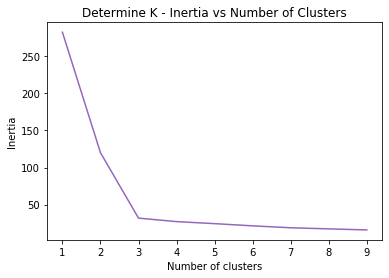

In [13]:
sse = {} #Empty dictionary to store key value pairs. Key = Number of clusters value = Inertia

for k in range(1,10):               #Find the inertia when number of clusters=1,2,3,4...
    kmeans = KMeans(n_clusters = k) #Initiate algorithm
    kmeans = kmeans.fit(cdf)        #fit the algorithm to the data
    sse[k] = kmeans.inertia_        #obtain the inertia and store in the dictionary

#Code to plot Inertia vs Number of clusters
plt.plot(list(sse.keys()),          #Convert keys to list allowing matplotlib to accept the values
         list(sse.values()),        #Convert values to list allowing matplotlib to accept the values
         color='tab:purple')


plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Determine K - Inertia vs Number of Clusters")
plt.show()


k = 3 is a good number of clusters

#### <a name="map4"> 4. KMeans to predict clusters </a> <br>
Use K = 3 and output clusters

In [12]:
k = 3                           
kmeanssplit1 = KMeans(n_clusters = k,            #Apply the algorithm with k =3
                      random_state = 42)         #Repeatability
kmeanssplit1 = kmeanssplit1.fit(cdf)

In [14]:
Set1['Clusters'] = kmeanssplit1.predict(cdf)

In [15]:
Set1.head()

,Did you experience any delays on your flight,The plane was clean,You enjoyed the food during your flight,Flight attendants solved your problems quickly,You enjoyed the customer service during your flight,You would like to travel with us again,Name,Clusters
0,2.0,4.0,3.0,3.0,1.0,1.0,Sarah,2
1,3.0,1.0,1.0,2.0,1.0,2.0,Mo,0
2,1.0,3.0,3.0,2.0,1.0,0.0,David,2
3,1.0,4.0,3.0,2.0,0.0,1.0,Neil,2
4,0.0,3.0,3.0,3.0,0.0,4.0,Viraj,1


#### <a name="map5">5. Visualise Results </a>

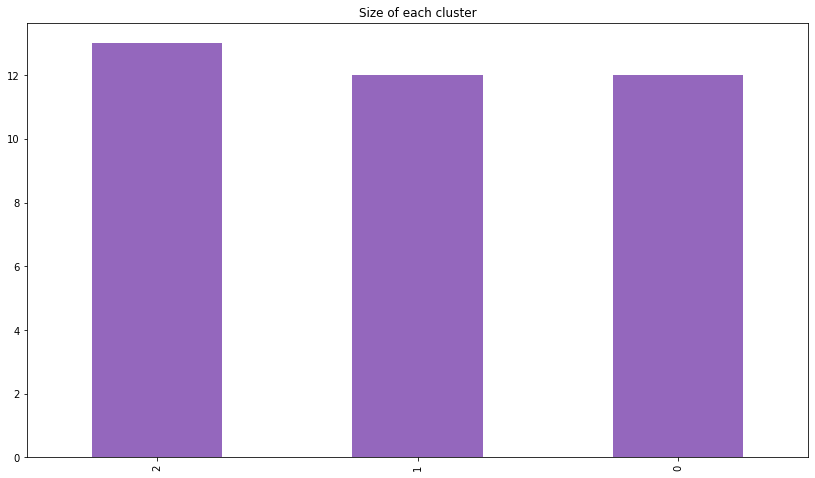

In [21]:
ax = Set1['Clusters'].value_counts().plot(kind='bar',
                                             x = 'Cluster',
                                             y = 'Count',
                                             figsize=(14,8),
                                             color  = 'tab:purple',
                                             title  = "Size of each cluster")

In [22]:
#### Split the data into three tables to help create box plots for each seperate cluster
 
d={}   #Initiate dictionary


for x in range(0,3):                                     #for 0,1 and 2
        d["df{0}".format(x)]= Set1[(Set1.Clusters == x)] #filter the table based on cluster number

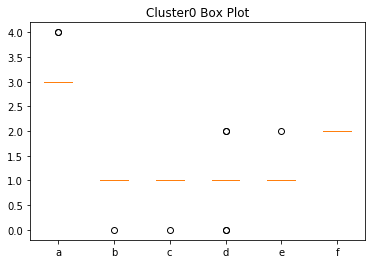

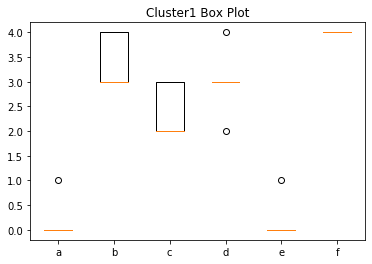

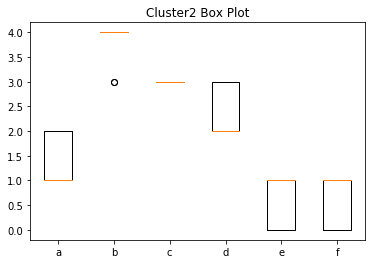

In [32]:
#Plot a box plot for each cluster
for x in range(0,3):
    fig1, ax1 = plt.subplots()
    box_plot_data = (d["df{0}".format(x)].iloc[:,0],
                 d["df{0}".format(x)].iloc[:,1],
                 d["df{0}".format(x)].iloc[:,2],
                 d["df{0}".format(x)].iloc[:,3],
                 d["df{0}".format(x)].iloc[:,4],
                 d["df{0}".format(x)].iloc[:,5])
    
    plt.boxplot(box_plot_data)
    ax1.set_title(str("Cluster{0} ".format(x)) +  "Box Plot")
    plt.xticks([1,2,3,4,5,6], ['a','b','c','d','e','f'])
    plt.show()
    

#### Export to csv to consume in PowerBI

In [25]:
Set1.to_csv("CustomerFeedbackdata.csv", index = False)